In [2]:
!pip install keras

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import seaborn

In [7]:
def train_test_split(X, y):
    N = X.shape[0]
    split_size = int(N/5)
    split = int(N - 2*split_size)
    train_X = X[:split]
    train_y = y[:split]
    val_X = X[split:split+split_size]
    val_y = y[split:split+split_size]
    test_X = X[split+split_size:]
    test_y = y[split+split_size:]
    
    return train_X, train_y, val_X, val_y, test_X, test_y

def test_model(model, params, train_X, train_y, test_X, test_y):
    scorer = make_scorer(mean_squared_error, greater_is_better=False) # Use mean squared error as score
    gs = GridSearchCV(model, params, scoring=scorer) # Cross-validation to pick best hyperparameter
    gs.fit(train_X, train_y)
    gs.best_estimator_.fit(train_X, train_y)
    train_pred = gs.best_estimator_.predict(train_X) # Make prediction on training set
    test_pred = gs.best_estimator_.predict(test_X) # Make prediction on test set
    print("Training MSE: ", mean_squared_error(train_y, train_pred))
    print("Test MSE: ", mean_squared_error(test_y, test_pred))
    return gs.best_estimator_

### Tasks

1. Find the best model for predicting the returns of the S&P500
2. Advanced: calculate the returns of your model if it was put into use

### Load Data

#### Data consists of log-returns of the S&P500 on a particular date, with some other indicators that might predict it.

In [8]:
data = pd.read_csv("./real_data.csv", parse_dates=['date'])
data.head()

,date,Gold Price,USD GBP,US 10 Year Bond Price,VIX,S&P500,returns
0,2000-01-03,289.75,0.6308,93.614,21.64,1455.219971,-0.039099
1,2000-01-04,289.75,0.6308,93.614,21.64,1399.420044,0.001920
2,2000-01-05,273.35,0.6435,93.722,25.88,1402.109985,0.000955
3,2000-01-06,272.80,0.6692,93.809,22.36,1403.449951,0.026730
4,2000-01-07,272.80,0.6692,93.809,22.36,1441.469971,0.011128


In [9]:
### Put your preprocessing code here




In [69]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
train_X = train_data.drop(['returns', 'date'], axis=1)
train_y = train_data['returns']
test_X = test_data.drop(['returns', 'date'], axis=1)
test_y = test_data['returns']

In [73]:
model = Pipeline([('features', None),
                  ('preprocess', None),
                  ('model', None)])


In [74]:
params = dict(model=[Lasso()], model__alpha=np.logspace(-2, 3), features=[None], preprocess=[None])
simple_model = test_model(model, params, train_X, train_y, test_X, test_y)
test_pred = simple_model.predict(test_X)

Training MSE:  0.00018034267636830447
Test MSE:  7.07129469746939e-05


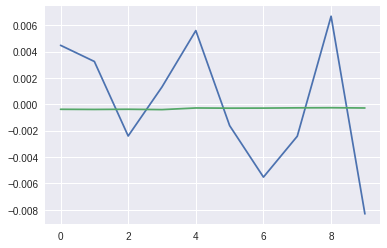

In [75]:
plot(test_y.values[0:10])
plot(test_pred[0:10])